# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.24.1


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2049536
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [70 50 54 56 59 61 73 71 57 49]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [70 50 54 56 59 61 73 71 57 49]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


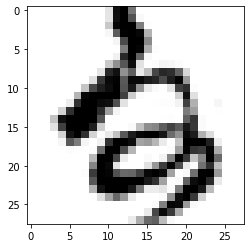

LABEL: 4
INPUT:


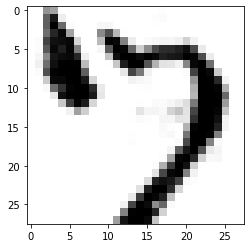

LABEL: 3
INPUT:


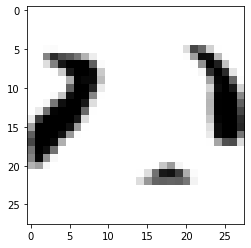

LABEL: 5


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (20,20,), (40,20,10) ]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#ADD YOUR CODE
clf = GridSearchCV(mlp, parameters,cv=5)
clf.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
clf = GridSearchCV(mlp, parameters,refit=True,cv=5)
clf.fit(X_train, y_train)
print(clf.best_score_)

print("\nAll scores on the grid:")
#ADD YOUR CODE
all_scores = pd.DataFrame(clf.cv_results_)
all_scores

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (40,)}
Score with best parameters:
0.7016666666666667

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.345422,0.062784,0.000455,0.000015,"(10,)","{'hidden_layer_sizes': (10,)}",0.583333,0.600000,0.683333,0.525000,0.541667,0.586667,0.055428,5
1,0.163515,0.005507,0.000498,0.000021,"(20,)","{'hidden_layer_sizes': (20,)}",0.733333,0.691667,0.708333,0.675000,0.666667,0.695000,0.023921,2
2,0.197319,0.002556,0.000527,0.000014,"(40,)","{'hidden_layer_sizes': (40,)}",0.741667,0.716667,0.741667,0.691667,0.616667,0.701667,0.046368,1
3,0.138289,0.007416,0.000505,0.000005,"(20, 20)","{'hidden_layer_sizes': (20, 20)}",0.658333,0.650000,0.716667,0.633333,0.633333,0.658333,0.030732,4
4,0.254812,0.098187,0.000580,0.000022,"(40, 20, 10)","{'hidden_layer_sizes': (40, 20, 10)}",0.725000,0.608333,0.700000,0.675000,0.708333,0.683333,0.040825,3


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

#ADD YOUR CODE
# Best model was consisting of (40,) hidden layer sizes so I go on with it

mlp = MLPClassifier(hidden_layer_sizes= (40,), max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#ADD YOUR CODE
clf = GridSearchCV(mlp, parameters,cv=kf)
clf.fit(X_train, y_train)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

#ADD YOUR CODE

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
clf = GridSearchCV(mlp, parameters,refit=True,cv=kf)
clf.fit(X_train, y_train)
print(clf.best_score_)

print("\nAll scores on the grid:")
#ADD YOUR CODE
all_scores = pd.DataFrame(clf.cv_results_)
all_scores

/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
 

RESULTS FOR NN

Best parameters set found:
{'batch_size': 32}
Score with best parameters:


/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
 

0.7350000000000001

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,17.262656,2.549511,0.001054,0.000236,1,{'batch_size': 1},0.083333,0.150000,0.075000,0.058333,0.083333,0.090000,0.031358,3
1,0.379659,0.029927,0.000839,0.000066,32,{'batch_size': 32},0.783333,0.733333,0.733333,0.808333,0.616667,0.735000,0.065912,1
2,0.341194,0.010329,0.001350,0.000084,480,{'batch_size': 480},0.716667,0.700000,0.691667,0.766667,0.583333,0.691667,0.060093,2


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

Finding the optimum batch size is important to tune accuracy and error score of the neural network. The number of samples each time from the training dataset that is used in the estimate of the error gradient is called the batch size and affects dynamics of the learning algorithm. If we use a larger batch size to train our model we may get computational speedups however, it is well known that too large of a batch size will lead to poor generalization. On the other hand if we use a small batch the we'll get more noise. 

As for the interpretation of the above table, I get the best performance when I tune neural network as 32, and I get worse performance when I tune the batch size as 1, updating weights after each sample may cause noise which then turns out a poor generalization. 

Also as for the number of layers and layer sizes, setting too low number of nodes as (10,) may cause underfit model will not be able learn efficiently. According to my experiment above it got the worse score with (10,). Also placing too many hidden layers may cause overfit which leads to poor generalization once again. Setting (40,20,10) also got the rank 3. In my case the layer and layer size structure (40,) got the best rank.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...


/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.42 sec

Training MLP of size (20,) ...
Done, training time: 0.41 sec

Training MLP of size (40,) ...
Done, training time: 0.45 sec

Training MLP of size (20, 20) ...
Done, training time: 0.31 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 0.55 sec



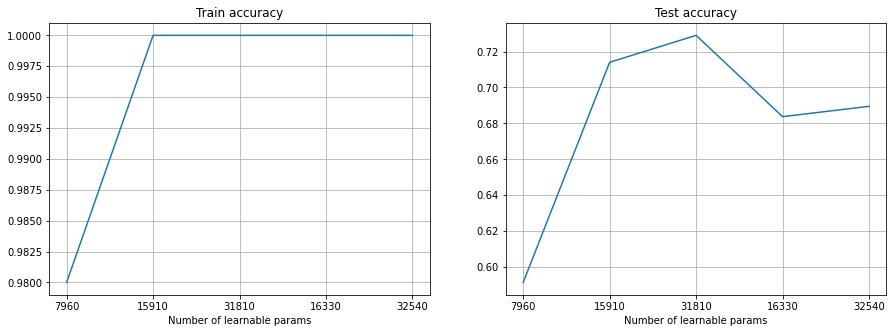

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes= hl_size, max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
    mlp.fit(X_train, y_train)
    #ADD YOUR CODE
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course.

## [ANSWER TO QUESTION 2]

When the training accuracy reach the %100, and the test accuracy reached it's optimum level and started to decrease, it is the sign of overfit. Overfitting means our models started to capture the noise in our data and generalization performance decreases further from that point. Here, in the above graphs that I've computed, on the train accuracy graph we can see that train accuracy reached %100 and never change again after 15910 learnable parameters point in the x-axis. Also, on the test accuracy we can see that test accuracy reached it's maximum optimal rate at 31810 and then started to decrease, therefore the generalization performance decreases. Therefore increasing number of nodes in the hidden layers and layer number is good only up to some optimal point, after this optimal point creating too complex networks for the simple datasets may cause overfitting which then leads to performance downs on it's predictions.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

Training MLP of size (40, 20, 10) ...


/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training MLP of size (40, 20, 10) ...


/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training MLP of size (40, 20, 10) ...
Training MLP of size (40, 20, 10) ...


/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
 

RESULTS FOR NN

Best parameters set found:
{'learning_rate_init': 0.002}
Score with best parameters:
0.7050000000000001


/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


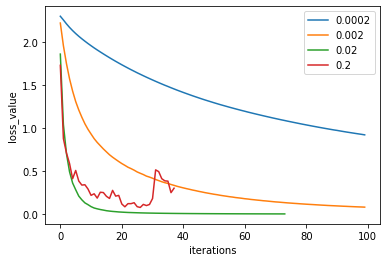

In [11]:
import matplotlib.pyplot as plt
import operator
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = {}

# ADD YOUR CODE,
# The best model that I found was the one with (40,) hidden layer sizes and batch_size with 32

for lr_rate in lr_list:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes= (40,), max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=lr_rate, batch_size=32)
    mlp.fit(X_train, y_train)
    #ADD YOUR CODE
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    loss_values = mlp.loss_curve_
    plt.plot(loss_values)

plt.legend([str(0.0002), str(0.002),str(0.02), str(0.2)])
plt.ylabel('loss_value')
plt.xlabel('iterations')

#The best learning rate which converged faster than the others was '0.02', hidden layer size = (40,), and the batch size was = 32
# Let's validate the same results we get above and print the best parameters set found
kf = sklearn.model_selection.KFold(n_splits=5)
parameters = {'learning_rate_init': [0.0002, 0.002, 0.02, 0.2]}
mlp = MLPClassifier(hidden_layer_sizes= (40,), max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    batch_size=32)


clf = GridSearchCV(mlp, parameters,refit=True,cv=kf)
clf.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
#ADD YOUR CODE
print(clf.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
print(clf.best_score_)

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?


## [ANSWER TO QUESTION 3]

According to the loss_value & iterations graph that we computed above, we can see that the learning rate 0.02 converged faster when it compared to the other learning rates that we experimented. The other learning rates such as 0.0002 took longer time to converge when compared to others due to the tiny updates in our network. On the other hand setting high learning rate will result in weight updates that will be too large, and there is a probability to miss optimal minima as we can see in the 0.2 example in the above example.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Training MLP of size (40, 20, 10) ...
Best NN training error: 0.000000
Best NN test error: 0.272750


Text(0, 0.5, 'Loss Score')

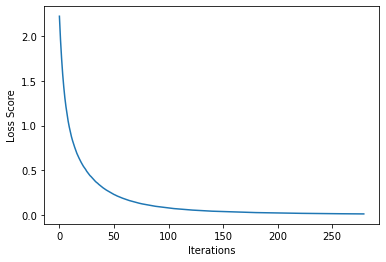

In [12]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE

print ('\nRESULTS FOR BEST NN\n')

train_acc_list, test_acc_list = [], []

print('Training MLP of size {} ...'.format(hl_size))
mlp = MLPClassifier(hidden_layer_sizes= (40,), max_iter=500, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.002, batch_size=32)
mlp.fit(X_train, y_train)

train_acc = mlp.score(X_train, y_train)
test_acc = mlp.score(X_test, y_test)

loss_values = mlp.loss_curve_
plt.plot(loss_values)

training_error = 1 - np.max(train_acc)
print ("Best NN training error: %f" % training_error)

test_error = 1 - np.max(test_acc)
print ("Best NN test error: %f" % test_error)

plt.xlabel('Iterations')
plt.ylabel('Loss Score')


## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [373 429 392 380 411 407 415 420 386 387]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

Training MLP of size (40, 20, 10) ...
Iteration 1, loss = 1.72682963
Iteration 2, loss = 1.09911671
Iteration 3, loss = 0.87273445
Iteration 4, loss = 0.75395202
Iteration 5, loss = 0.67714544
Iteration 6, loss = 0.62054491
Iteration 7, loss = 0.58018195
Iteration 8, loss = 0.54560033
Iteration 9, loss = 0.51698875
Iteration 10, loss = 0.49249113
Iteration 11, loss = 0.46962083
Iteration 12, loss = 0.44934921
Iteration 13, loss = 0.43122749
Iteration 14, loss = 0.41354929
Iteration 15, loss = 0.39654102
Iteration 16, loss = 0.38430975
Iteration 17, loss = 0.37061880
Iteration 18, loss = 0.35747324
Iteration 19, loss = 0.34622303
Iteration 20, loss = 0.33430287
Iteration 21, loss = 0.32305463
Iteration 22, loss = 0.31213218
Iteration 23, loss = 0.30137951
Iteration 24, loss = 0.29121724
Iteration 25, loss = 0.28333456
Iteration 26, loss = 0.27306843
Iteration 27, loss = 0.26601262
Iteration 28, loss = 0.25730923
Iteration 29, loss = 0.25031462
Iteration 30, loss = 0.24142144
Iteration 3

/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Best NN training error: 0.020750
Best NN test error: 0.158232


Text(0, 0.5, 'Loss Score')

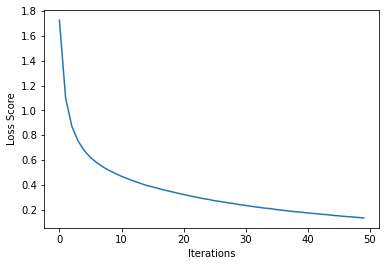

In [14]:
# use best architecture and params from before

#ADD YOUR CODE

train_acc_list, test_acc_list = [], []

print('Training MLP of size {} ...'.format(hl_size))
mlp = MLPClassifier(hidden_layer_sizes= (40,), max_iter=50, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.002, batch_size=32, verbose=True)
mlp.fit(X_train, y_train)
#ADD YOUR CODE
train_acc = mlp.score(X_train, y_train)
test_acc = mlp.score(X_test, y_test)

loss_values = mlp.loss_curve_
plt.plot(loss_values)

training_error = 1 - np.max(train_acc)
print ("Best NN training error: %f" % training_error)

test_error = 1 - np.max(test_acc)
print ("Best NN test error: %f" % test_error)

plt.xlabel('Iterations')
plt.ylabel('Loss Score')


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

Results for the 600 data points,

Best NN training error: 0.000000 &
Best NN test error: 0.272750

Results for the 4000 data points,

Best NN training error: 0.020750 &
Best NN test error: 0.158232

We can obviously see that the test error for the 4000 data points is better than the 600 data points, including more and different data samples provides better generalization performance to the models that we have created. The better generalization means the better predictive performance when the model encounters with the out of sample data that we didn't train with.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

Number of samples in the K-MNIST dataset: 60000
(4000, 784) (4000,)


/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rabiayapicioglu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


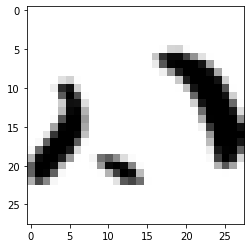

RESULTS:

MLP_600:  [2] true label:  5
MLP_4000:  [5] true label:  5


In [15]:
# NOW I'LL EXPERIMENT THE NEURAL NETWORK WITH 600 TRAINING POINTS

# Adding my code for the small neural network
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

print(X_test.shape,y_test.shape)
sample_index = 500

X = X_test[sample_index,:].reshape(-1,1)
X = X.reshape(1,784)


mlp_600 = MLPClassifier(hidden_layer_sizes= (40,), max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.002, batch_size=32)

mlp_600.fit(X_train, y_train)

NN_prediction =  mlp_600.predict(X)

# NOW I'LL EXPERIMENT THE NEURAL NETWORK WITH 4000 TRAINING POINTS

# Adding my code for the small neural network
X, y = load_mnist("data")
# rescale the data
X = X / 255.0

permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 4000
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]


sample_index = 100

X = X_test[sample_index,:].reshape(-1,1)
X = X.reshape(1,784)


mlp_4000 = MLPClassifier(hidden_layer_sizes= (40,), max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.002, batch_size=32)

mlp_4000.fit(X_train, y_train)


large_NN_prediction = mlp_4000.predict(X)

plt.imshow( X.reshape(28,28), cmap = plt.cm.gray_r, interpolation = "nearest")
plt.show()

print("RESULTS:\n")
print('MLP_600: ', NN_prediction, 'true label: ', y_test[sample_index])
print('MLP_4000: ', large_NN_prediction, 'true label: ', y_test[sample_index])


#ADD YOUR CODE
        

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


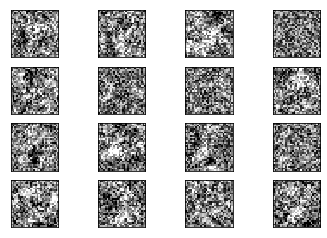

Weights with 4000 data points:


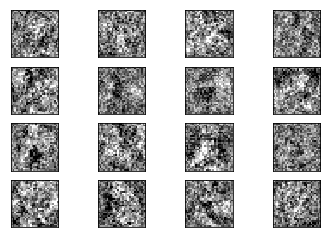

In [16]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_600.coefs_[0].min(), mlp_600.coefs_[0].max()
for coef, ax in zip(mlp_600.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_4000.coefs_[0].min(), mlp_4000.coefs_[0].max()
for coef, ax in zip(mlp_4000.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

The weights that we visualized above can show us that they are learning some spatial structures. This could be an easy to check that our neurons are learning, a step towards understanding our neuron’s behavior. We can observe that the weight visualization map with the 4000 data points created nicer spatial structures than the data samples with 400 one.



### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [17]:
from sklearn.svm import SVC

X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC( kernel='rbf', degree=3, C=10, gamma=0.01)
best_SVM.fit(X_train,y_train)

# My best SVM model was the one with gamma , 0.01, c = 10 and degree = 3 with 'rbf' kernel, so defining it as follows
#ADD YOUR CODE

print ('RESULTS FOR SVM')

SVM_training_error =  1 - best_SVM.score(X_train, y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1 - best_SVM.score(X_test, y_test)
print("Test score SVM:")
print(SVM_test_error)

Number of samples in the K-MNIST dataset: 60000
RESULTS FOR SVM
Training score SVM:
0.0
Test score SVM:
0.08279999999999998


In [18]:
from sklearn import linear_model

# We use C=1 for regularization again here
regL2 = linear_model.LogisticRegression( random_state=0, C=1, max_iter=500 ).fit(X_train, y_train)

# you can re-use your code from Lab 2

#ADD YOUR CODE

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error =  1- regL2.score(X_train,y_train)
test_error =  1 - regL2.score(X_test, y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.027200
Test error (reg): 0.245000


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

RESULTS FOR NN
Best NN training error: 0.020750 & Best NN test error: 0.158232


RESULTS FOR SVM
Training score SVM: 0.0 & Test score SVM: 0.0827999999999999

RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.027200 & Test error (reg): 0.245000

As we can observe from the above results. In my case with this dataset SVM produced and result in with better test error and accuracy rates than the others. Neural Network has shown better performance than the Logistic Regression with regularization. But in different datasets this results may change, and more adjustable neural networks may show better performance than the other models that we created above, we need to test and compare in order to make a correct decision.